In [2]:
import h5py
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

f = h5py.File('group_2024-11-06_08-02-46.touch')

data_size = list(f.keys())

print(f["Test"].values()) # Print number of members in a group

print(list(f["Test"].keys()))

image = cv2.imread("Image", np.asarray(f["Test"]["image_000400_cv2"])) # Show one of the image 

#print(np.asarray(f["Thumb"]["image_000085_cv2"]))

plt.imshow(image)
plt.show()

ModuleNotFoundError: No module named 'h5py'

[ WARN:0@89.039] global loadsave.cpp:241 findDecoder imread_('Average'): can't open/read file: check file path/integrity
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


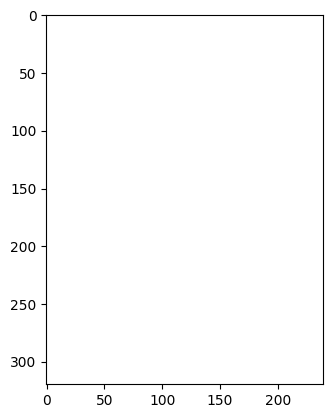

In [3]:
dataset = list(f["Test"].keys())

""" 
  Calculating the average frame intensity at each pixel

"""

frame_intensity = [np.stack(np.asarray(f["Test"][i]), axis=0) for i in dataset[:]]

average_frame_intensity = np.average(frame_intensity, axis=0)
average_frame_intensity = average_frame_intensity.astype(np.float64)

#print(average_frame_intensity)

plt.imshow(cv2.imread("Average", average_frame_intensity))
plt.show()


[ WARN:0@89.386] global loadsave.cpp:241 findDecoder imread_('Substract'): can't open/read file: check file path/integrity


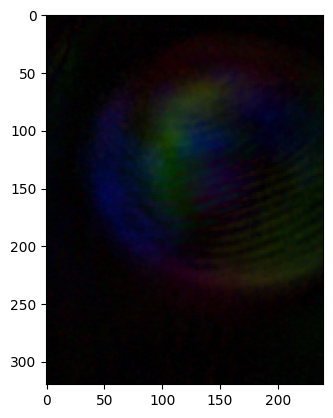

In [4]:
""" 
    Substracking the average intesity frame from each frame
"""

image_float = image.astype(np.float32)

substracted_image = np.abs(image_float - average_frame_intensity).astype(np.uint8)

plt.imshow(cv2.imread("Substract", substracted_image))
plt.show()

(3, 3)


[ WARN:0@5085.642] global loadsave.cpp:241 findDecoder imread_('surface_normal'): can't open/read file: check file path/integrity


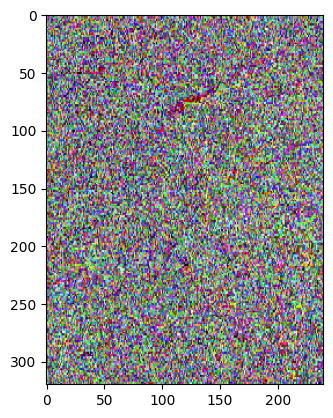

In [21]:
random_number = random.choice(dataset)
random_image = np.asarray(f["Test"][random_number])

rgb_location = np.array([
    [0.01, 0.01732, 0.01], # R
    [0.01, -0.01732, 0.01], # G
    [0.01, 0, -0.02] # B
])
#print(random_image)
print(rgb_location.shape)

def calculate_surface_normals(image, rgb_location, surface_normals):
    """ 
        0*x + 0.01732*y + 0.01*z = R
        0*x - 0.01732*y + 0.01*z = G
        0*x + 0*x - 0.02*z = B
    """
    for row in range(image.shape[0]):
        for col in range(image.shape[1]):
            pixel = image[row, col]
            normal_pixel = np.linalg.solve(rgb_location, pixel)
            surface_normals[row, col] = normal_pixel

    return surface_normals

surface_normal = np.zeros_like(random_image)
surface_normal = calculate_surface_normals(random_image, rgb_location, surface_normal)

plt.imshow(cv2.imread("surface_normal", surface_normal))
plt.show()

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
"""
frames = cv2.VideoCapture('marker.m4v')


try: 
      
    # creating a folder named data 
    if not os.path.exists('data'): 
        os.makedirs('data') 
  
# if not created then raise error 
except OSError: 
    print ('Error: Creating directory of data') 
  
# frame 
currentframe = 0
  
while(True): 
      
    # reading from frame 
    ret,frame = frames.read() 
  
    if ret: 
        # if video is still left continue creating images 
        name = './data/frame' + str(currentframe) + '.jpg'
        print ('Creating...' + name) 
  
        # writing the extracted images 
        cv2.imwrite(name, frame) 
  
        # increasing counter so that it will 
        # show how many frames are created 
        currentframe += 1
    else: 
        break
  
# Release all space and windows once done 
frames.release() 
cv2.destroyAllWindows() 
"""

"\nframes = cv2.VideoCapture('marker.m4v')\n\n\ntry: \n      \n    # creating a folder named data \n    if not os.path.exists('data'): \n        os.makedirs('data') \n  \n# if not created then raise error \nexcept OSError: \n    print ('Error: Creating directory of data') \n  \n# frame \ncurrentframe = 0\n  \nwhile(True): \n      \n    # reading from frame \n    ret,frame = frames.read() \n  \n    if ret: \n        # if video is still left continue creating images \n        name = './data/frame' + str(currentframe) + '.jpg'\n        print ('Creating...' + name) \n  \n        # writing the extracted images \n        cv2.imwrite(name, frame) \n  \n        # increasing counter so that it will \n        # show how many frames are created \n        currentframe += 1\n    else: \n        break\n  \n# Release all space and windows once done \nframes.release() \ncv2.destroyAllWindows() \n"

[ WARN:0@140.005] global loadsave.cpp:241 findDecoder imread_('Marker'): can't open/read file: check file path/integrity


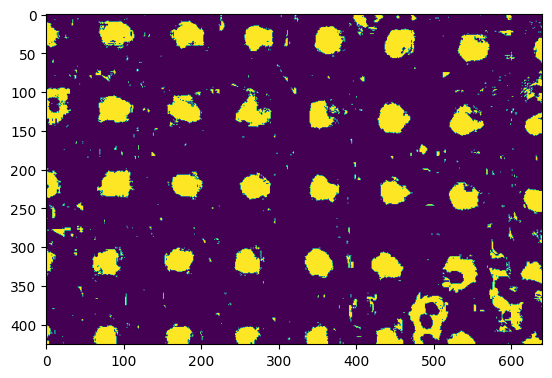

In [15]:
frame = cv2.imread('./data/frame0.jpg')

rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
gray_frame = cv2.cvtColor(rgb_frame, cv2.COLOR_RGB2GRAY)

threshold_image = cv2.adaptiveThreshold(gray_frame, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 31, 2)



plt.imshow(cv2.imread("Marker", threshold_image))
plt.show()

[ WARN:0@1040.698] global loadsave.cpp:241 findDecoder imread_('erosion'): can't open/read file: check file path/integrity


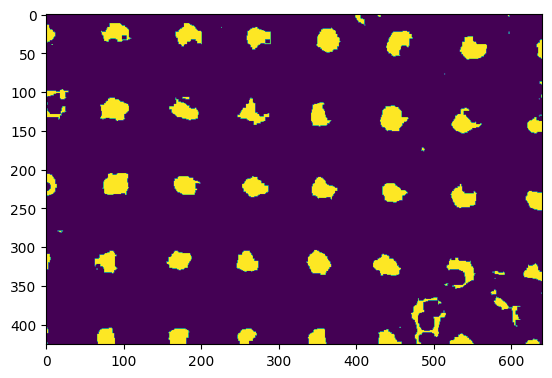

In [37]:
#img = cv2.imread('./data/frame0.jpg', cv2.IMREAD_GRAYSCALE)
#assert img is not None, "file could not be read, check with os.path.exists()"

kernel = np.ones((5,5),np.uint8)

erosion = cv2.erode(threshold_image, kernel, iterations = 1)

opening = cv2.morphologyEx(threshold_image, cv2.MORPH_OPEN, kernel)

plt.imshow(cv2.imread("erosion", erosion))
plt.show()

[ WARN:0@1083.215] global loadsave.cpp:241 findDecoder imread_('erosion'): can't open/read file: check file path/integrity


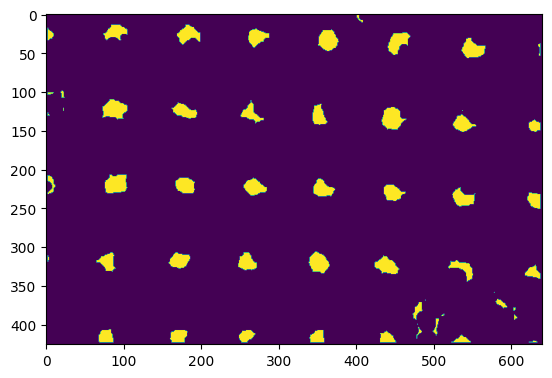

In [39]:
contours, hierarchy = cv2.findContours(erosion, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(erosion, contours, -1, (0,0,0), 1)

plt.imshow(cv2.imread("erosion", erosion))
plt.show()